In [ ]:
!pip install pyradiomics


In [ ]:
# Install necessary packages
!pip install numpy
!pip install SimpleITK
!pip install pandas
!pip install openpyxl
!pip install nibabel
#!pip install pyradiomics

In [1]:
# Import necessary libraries
import os
import radiomics
from radiomics import featureextractor
import pandas as pd
import numpy as np
import nibabel as nib
import SimpleITK as sitk


In [2]:
# Directory containing the NIfTI files
data_dir = 'C:/Users/17753/Downloads/AsWorks/Features/DWI/DWImasks/'

In [3]:
# Initialize the PyRadiomics feature extractor with default parameters
extractor = radiomics.featureextractor.RadiomicsFeatureExtractor()
# extractor.enableAllFeatures()  # Uncomment to enable all feature groups

# Store results in a list
results = []

# Loop through all .nii.gz files
for file in os.listdir(data_dir):
    if file.endswith('.nii.gz'):
        file_path = os.path.join(data_dir, file)
        
        try:
            # Image and mask are the same file in this case
            features = extractor.execute(file_path, file_path)  # Use the same file for image and mask
            
            # Add Patient ID
            features['PatientID'] = file
            
            # Append results
            results.append(features)
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Convert results to a DataFrame
df = pd.DataFrame(results)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [4]:
#Save extracted file to the T2W folder
df.to_excel('C:/Users/17753/Downloads/AsWorks/Features/DWI/DWImask_radiomics_features.xlsx', index=False)

In [5]:
#Load clinical data
# Load the clinical data
clinical_data = pd.read_excel("C:/Users/17753/Downloads/AsWorks/Response variables.xlsx")

# Inspect the data
print(clinical_data.head(3))

             PatientID  age  gender  slm mrTstage mrNstage  \
0  MR1809250021.nii.gz   53    Male  Yes       T3       N1   
1  MR1906110224.nii.gz   75  Female   No       T4       N2   
2  MR1906190226.nii.gz   47    Male   No       T3       N0   

   rectal_tumor_size_cm  dist_lowerEdge_lesion2analVerge_cm  \
0                   5.0                                12.0   
1                   4.3                                 4.5   
2                   3.0                                 2.0   

    circumferential_range  location  
0                     1.00   upper   
1                     0.25     low   
2                     0.50     low   


In [6]:
# Merge the radiomic T2W feature extracted data and clinical data on 'PatientID'
combinedDWI_Clinical = pd.merge(df, clinical_data, on="PatientID", how="inner")

# Inspect the combined dataset
print(combinedDWI_Clinical.head(3))

  diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0          3.1.0a2.post22+g39aaa77                     1.26.4   
1          3.1.0a2.post22+g39aaa77                     1.26.4   
2          3.1.0a2.post22+g39aaa77                     1.26.4   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          2.4.0                          1.7.0   
1                          2.4.0                          1.7.0   
2                          2.4.0                          1.7.0   

  diagnostics_Versions_Python  \
0                      3.12.7   
1                      3.12.7   
2                      3.12.7   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2  {'minimumROIDimensions': 2, 'minimumROISize': ...   

  diagnostics_Configuration_EnabledImageTypes  \
0                            {'Original': {}}   
1             

In [7]:
combinedDWI_Clinical.to_csv("C:/Users/17753/Downloads/AsWorks/Features/DWI/combinedDWI_Clinical.csv", index=False)
print("Combined data saved to 'combinedDWI_Clinical.csv'.")

Combined data saved to 'combinedDWI_Clinical.csv'.


In [8]:
#I want only response variable (SLM=Syncronous Liver Metastasis) to radiomic feature extracted dataset


# Load only the necessary columns (PatientID and liver metastasis)
response_var = pd.read_excel("C:/Users/17753/Downloads/AsWorks/Response variables.xlsx", usecols=["PatientID", "slm"])

# Inspect the data
print(response_var.head(2))

             PatientID  slm
0  MR1809250021.nii.gz  Yes
1  MR1906110224.nii.gz   No


In [9]:
#Combined response variable and feature data
# Merge the radiomic features with liver metastasis data on PatientID
df_combinedResp = pd.merge(df, response_var, on="PatientID", how="inner")

# Inspect the combined DataFrame
print(df_combinedResp.head(3))
df_combinedResp.to_csv("C:/Users/17753/Downloads/AsWorks/Features/DWI/radiomic_DWIfeatures_with_liver_metastasis.csv", index=False)


  diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0          3.1.0a2.post22+g39aaa77                     1.26.4   
1          3.1.0a2.post22+g39aaa77                     1.26.4   
2          3.1.0a2.post22+g39aaa77                     1.26.4   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          2.4.0                          1.7.0   
1                          2.4.0                          1.7.0   
2                          2.4.0                          1.7.0   

  diagnostics_Versions_Python  \
0                      3.12.7   
1                      3.12.7   
2                      3.12.7   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2  {'minimumROIDimensions': 2, 'minimumROISize': ...   

  diagnostics_Configuration_EnabledImageTypes  \
0                            {'Original': {}}   
1             

In [10]:
# Load the combined dataset
df_combinedResp = pd.read_csv("C:/Users/17753/Downloads/AsWorks/Features/DWI/radiomic_DWIfeatures_with_liver_metastasis.csv")

# Convert target variable to binary (if it's categorical)
df_combinedResp['slm'] = df_combinedResp['slm'].map({'Yes': 1, 'No': 0})

# Separate features and target variable
X = df_combinedResp.drop(columns=["PatientID", "slm"])
y = df_combinedResp["slm"]

In [11]:
print(df_combinedResp.head(2))
print(X.dtypes)

  diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0          3.1.0a2.post22+g39aaa77                     1.26.4   
1          3.1.0a2.post22+g39aaa77                     1.26.4   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          2.4.0                          1.7.0   
1                          2.4.0                          1.7.0   

  diagnostics_Versions_Python  \
0                      3.12.7   
1                      3.12.7   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   

  diagnostics_Configuration_EnabledImageTypes  \
0                            {'Original': {}}   
1                            {'Original': {}}   

            diagnostics_Image-original_Hash  \
0  702e3dceea4a5fd470ae6806a1661ec4482351a1   
1  c865c3de221fd117714f0a401b908c78b8cc1f33   

  diagnostics_Image-original_Dimensionality

In [ ]:
#I checked dataset and need to remove some non numerical data 

In [12]:
# Drop columns by their index
columns_to_drop = list(range(0, 11)) + list(range(14, 18)) + [20, 21]
X_numeric = X.drop(X.columns[columns_to_drop], axis=1)
# Check the resulting DataFrame
print(X_numeric.shape)  # To check the number of remaining columns
#print(X_numeric.head(3))  # To inspect the first few rows
print(X_numeric.info())

(137, 112)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Columns: 112 entries, diagnostics_Image-original_Mean to original_ngtdm_Strength
dtypes: float64(109), int64(3)
memory usage: 120.0 KB
None


In [13]:
#Radiomic features often have different scales. Normalize the data to ensure features are on the same scale.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

In [15]:
#Method 1#Lasso Regression (Regularization):Lasso regression shrinks less important feature coefficients to zero.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Use logistic regression with L1 penalty
lasso = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000)
lasso.fit(X_scaled, y)

# Use SelectFromModel to extract important features
model1 = SelectFromModel(lasso, prefit=True)
selected_DWIfeatures_lasso = X_numeric.columns[model1.get_support()]
print("Lasso Selected Features:", selected_DWIfeatures_lasso)


Lasso Selected Features: Index(['diagnostics_Image-original_Mean', 'original_shape_Elongation',
       'original_shape_Maximum2DDiameterColumn', 'original_shape_MeshVolume',
       'original_shape_SurfaceVolumeRatio', 'original_gldm_DependenceVariance',
       'original_glrlm_RunLengthNonUniformity', 'original_glrlm_RunVariance',
       'original_glszm_SmallAreaEmphasis',
       'original_glszm_SmallAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZonePercentage'],
      dtype='object')


In [17]:
#Method2 #Recursive Feature Elimination (RFE):RFE works by recursively removing the least important features based on a model.
from sklearn.feature_selection import RFE

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Perform RFE to select the top 10 features
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_scaled, y)

# Get selected feature names
selected_features_rfe = X_numeric.columns[rfe.support_]
print("RFE Selected Features:", selected_features_rfe)

RFE Selected Features: Index(['original_shape_Elongation', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume',
       'original_firstorder_TotalEnergy',
       'original_gldm_DependenceNonUniformityNormalized',
       'original_gldm_DependenceVariance',
       'original_gldm_LargeDependenceEmphasis', 'original_glrlm_RunVariance',
       'original_glszm_SmallAreaEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZonePercentage'],
      dtype='object')


In [19]:
#Evaluate the Features: After selecting features, evaluate their performance using logistic regression:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, model1.get_support()], y, test_size=0.2, random_state=42)

print("DWI of Train Features: {}".format(X_train.shape))
print("DWI of Test Features: {}".format(X_test.shape))
print("DWI of Train Target: {}".format(y_train.shape))
print("DWI of Test Target: {}".format(y_test.shape))

DWI of Train Features: (109, 12)
DWI of Test Features: (28, 12)
DWI of Train Target: (109,)
DWI of Test Target: (28,)


In [20]:
# Train logistic regression model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8 8]
 [3 9]]
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.53      0.75      0.62        12

    accuracy                           0.61        28
   macro avg       0.63      0.62      0.61        28
weighted avg       0.64      0.61      0.60        28



In [21]:
#To understand feature importance for interpretability

# Get feature importance from coefficients
importance = np.abs(logreg.coef_[0])
feature_importance = dict(zip(selected_DWIfeatures_lasso, importance))
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

Feature Importance:
original_glszm_ZonePercentage: 0.8801399311781642
original_shape_SurfaceVolumeRatio: 0.8609323323760062
original_glrlm_RunVariance: 0.7507683383100051
original_shape_MeshVolume: 0.5810189154259924
original_gldm_DependenceVariance: 0.3692959387996428
diagnostics_Image-original_Mean: 0.19316045977867602
original_shape_Elongation: 0.1855846449715531
original_shape_Maximum2DDiameterColumn: 0.12066070792047563
original_glrlm_RunLengthNonUniformity: 0.06543860556962673
original_glszm_SmallAreaEmphasis: 0.018550816767280126
original_glszm_SmallAreaHighGrayLevelEmphasis: 0.018550816767280126
original_glszm_SmallAreaLowGrayLevelEmphasis: 0.018550816767280126


In [22]:
# Set the importance threshold to remove less important features
threshold = 0.15

# Filter features with importance above the threshold
selected_features = [feature for feature, importance in sorted_features if importance >= threshold]

print("Selected Features After Thresholding:")
for feature in selected_features:
    print(feature)

Selected Features After Thresholding:
original_glszm_ZonePercentage
original_shape_SurfaceVolumeRatio
original_glrlm_RunVariance
original_shape_MeshVolume
original_gldm_DependenceVariance
diagnostics_Image-original_Mean
original_shape_Elongation


In [23]:
# Filter the dataset to include only selected features
X_reduced = X_numeric[selected_features]

print("Reduced Dataset Shape:", X_reduced.shape)

Reduced Dataset Shape: (137, 7)


In [24]:
#Train Models with Reduced Features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the reduced dataset into training and testing sets
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_trainR, y_trainR)


# Predict and evaluate the model
y_predR = logreg.predict(X_testR)
print("Confusion Matrix:\n", confusion_matrix(y_testR, y_predR))
print("Classification Report:\n", classification_report(y_testR, y_predR))

Confusion Matrix:
 [[ 5 11]
 [ 1 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.31      0.45        16
           1       0.50      0.92      0.65        12

    accuracy                           0.57        28
   macro avg       0.67      0.61      0.55        28
weighted avg       0.69      0.57      0.54        28



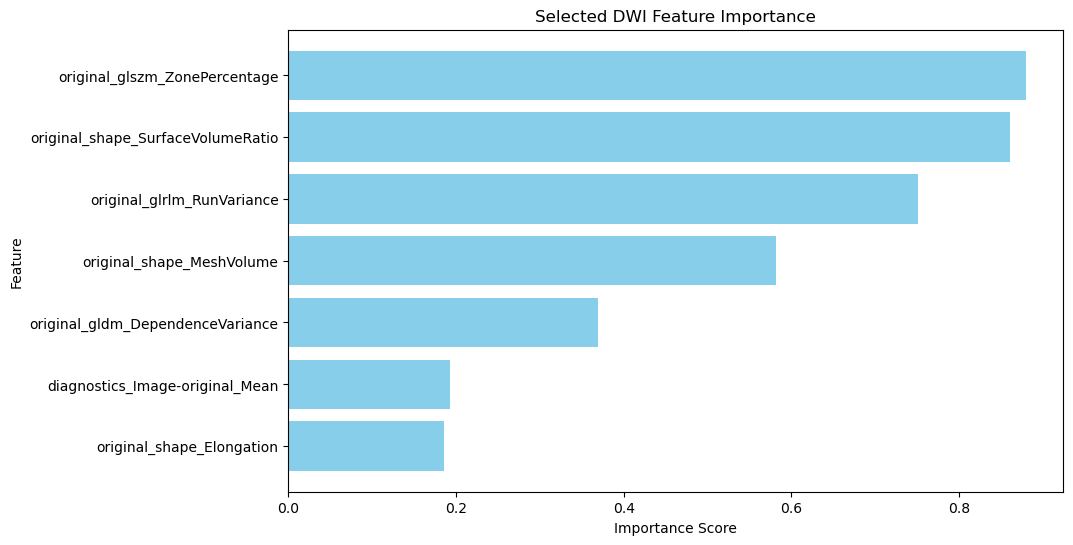

In [25]:
import matplotlib.pyplot as plt

# Plot feature importance
selected_importance = [importance for feature, importance in sorted_features if importance >= threshold]
plt.figure(figsize=(10, 6))
plt.barh(selected_features, selected_importance, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Selected DWI Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [26]:
#crooss validation example
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg1 = LogisticRegression(max_iter=10000)

# Perform 5-fold cross-validation on the reduced dataset
scores1 = cross_val_score(logreg1, X_reduced, y, cv=5, scoring='accuracy')

# Print the results
print("5-Fold Cross-Validation Scores:", scores1)
print("Mean Accuracy:", scores1.mean())
print("Standard Deviation:", scores1.std())



5-Fold Cross-Validation Scores: [0.53571429 0.82142857 0.62962963 0.40740741 0.55555556]
Mean Accuracy: 0.58994708994709
Standard Deviation: 0.13609047771167798


In [27]:
from sklearn.model_selection import cross_validate

# Perform 5-fold cross-validation with multiple metrics
cv_results = cross_validate(logreg1, X_reduced, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Print the results for each metric
print("Accuracy Scores:", cv_results['test_accuracy'])
print("Mean Accuracy:", cv_results['test_accuracy'].mean())

print("Precision Scores:", cv_results['test_precision'])
print("Mean Precision:", cv_results['test_precision'].mean())

print("Recall Scores:", cv_results['test_recall'])
print("Mean Recall:", cv_results['test_recall'].mean())

print("F1 Scores:", cv_results['test_f1'])
print("Mean F1 Score:", cv_results['test_f1'].mean())

Accuracy Scores: [0.53571429 0.82142857 0.62962963 0.40740741 0.55555556]
Mean Accuracy: 0.58994708994709
Precision Scores: [0.5625     0.76470588 0.66666667 0.42857143 0.55555556]
Mean Precision: 0.5955999066293183
Recall Scores: [0.6        0.92857143 0.57142857 0.42857143 0.71428571]
Mean Recall: 0.6485714285714285
F1 Scores: [0.58064516 0.83870968 0.61538462 0.42857143 0.625     ]
Mean F1 Score: 0.6176621765331443


In [28]:
### Train each ML model and evaluate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
#Logistic regression model
logreg2 = LogisticRegression(max_iter=10000)
logreg2.fit(X_trainR, y_trainR)
y_pred_lr = logreg2.predict(X_testR)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_testR, y_pred_lr))
print(confusion_matrix(y_testR, y_pred_lr))
print(classification_report(y_testR, y_pred_lr))

Logistic Regression Results
Accuracy: 0.5714285714285714
[[ 5 11]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.83      0.31      0.45        16
           1       0.50      0.92      0.65        12

    accuracy                           0.57        28
   macro avg       0.67      0.61      0.55        28
weighted avg       0.69      0.57      0.54        28



In [30]:
#Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
svm.fit(X_trainR, y_trainR)
y_pred_svm = svm.predict(X_testR)

print("Support Vector Machine Results")
print("Accuracy:", accuracy_score(y_testR, y_pred_svm))
print(confusion_matrix(y_testR, y_pred_svm))
print(classification_report(y_testR, y_pred_svm))

Support Vector Machine Results
Accuracy: 0.5
[[ 3 13]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.75      0.19      0.30        16
           1       0.46      0.92      0.61        12

    accuracy                           0.50        28
   macro avg       0.60      0.55      0.46        28
weighted avg       0.62      0.50      0.43        28



In [31]:
#Decision Tree (DT)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_trainR, y_trainR)
y_pred_dt = dt.predict(X_testR)

print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_testR, y_pred_dt))
print(confusion_matrix(y_testR, y_pred_dt))
print(classification_report(y_testR, y_pred_dt))

Decision Tree Results
Accuracy: 0.6428571428571429
[[10  6]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.57      0.67      0.62        12

    accuracy                           0.64        28
   macro avg       0.64      0.65      0.64        28
weighted avg       0.65      0.64      0.64        28



In [32]:
#Random Forest (RF)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_trainR, y_trainR)
y_pred_rf = rf.predict(X_testR)

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_testR, y_pred_rf))
print(confusion_matrix(y_testR, y_pred_rf))
print(classification_report(y_testR, y_pred_rf))

Random Forest Results
Accuracy: 0.5714285714285714
[[10  6]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        16
           1       0.50      0.50      0.50        12

    accuracy                           0.57        28
   macro avg       0.56      0.56      0.56        28
weighted avg       0.57      0.57      0.57        28



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

# Train models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_trainR, y_trainR)
    predictions[name] = model.predict(X_testR)

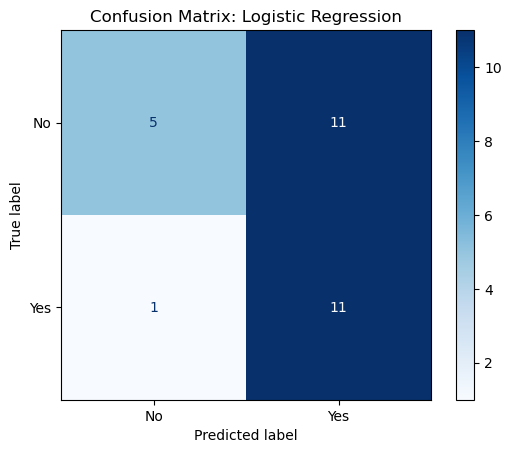

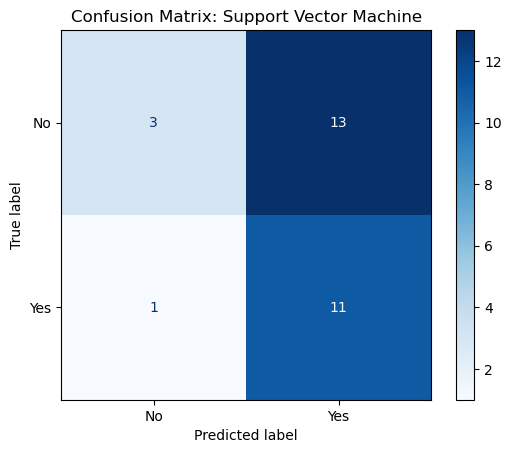

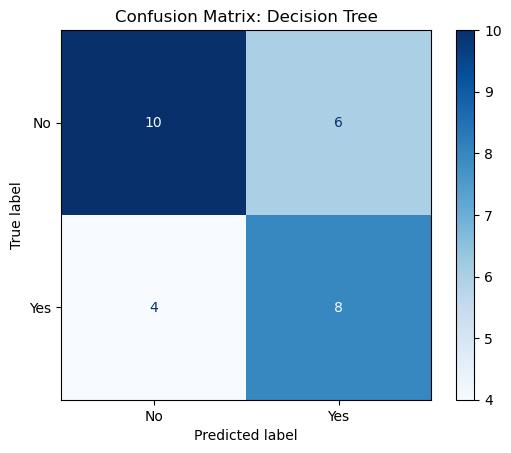

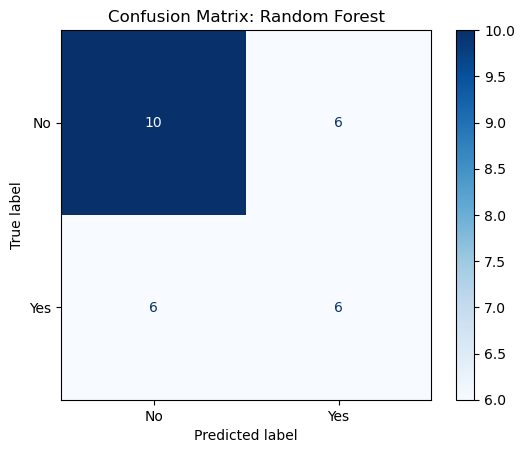

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrices for each model
for name, y_predR in predictions.items():
    cm = confusion_matrix(y_testR, y_predR)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [ ]:
#Let's try to improve model

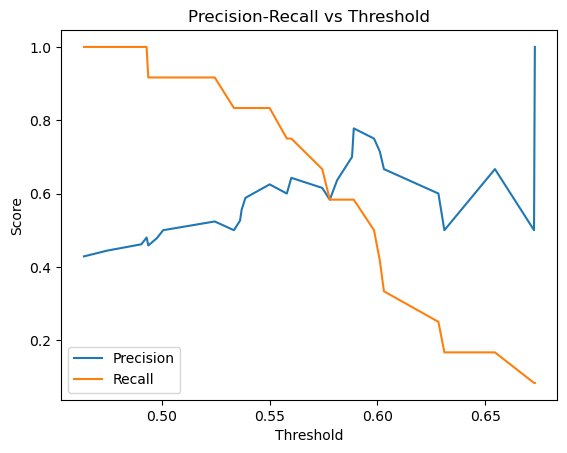

Confusion Matrix with New Threshold:
[[11  5]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.62      0.67      0.64        12

    accuracy                           0.68        28
   macro avg       0.67      0.68      0.67        28
weighted avg       0.68      0.68      0.68        28



In [39]:
#Logistic regression uses a default decision threshold of 0.5. 
#Adjusting this threshold can improve precision or recall depending on your focus.


import numpy as np
from sklearn.metrics import precision_recall_curve, roc_auc_score

# Get probabilities for the positive class
y_probs = logreg2.predict_proba(X_testR)[:, 1]

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_testR, y_probs)

# Plot precision-recall curve
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()

# Choose a new threshold (e.g., based on precision-recall tradeoff)
new_threshold = 0.57
y_pred_new_threshold = (y_probs >= new_threshold).astype(int)

# Evaluate new predictions
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix with New Threshold:")
print(confusion_matrix(y_testR, y_pred_new_threshold))
print(classification_report(y_testR, y_pred_new_threshold))

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Initialize SVM with probability=True
svm = SVC(kernel='linear', probability=True)
svm.fit(X_trainR, y_trainR)

# Get predicted probabilities for the positive class
y_probs_svm = svm.predict_proba(X_testR)[:, 1]

# Adjust the decision threshold (e.g., 0.4)
threshold = 0.555
y_pred_svm_threshold = (y_probs_svm >= threshold).astype(int)

# Evaluate the model
print("Confusion Matrix for SVM with Adjusted Threshold:")
print(confusion_matrix(y_testR, y_pred_svm_threshold))
print(classification_report(y_testR, y_pred_svm_threshold))

Confusion Matrix for SVM with Adjusted Threshold:
[[9 7]
 [3 9]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.56      0.75      0.64        12

    accuracy                           0.64        28
   macro avg       0.66      0.66      0.64        28
weighted avg       0.67      0.64      0.64        28



In [56]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_trainR, y_trainR)

# Get predicted probabilities for the positive class
y_probs_rf = rf.predict_proba(X_testR)[:, 1]

# Adjust the decision threshold (e.g., 0.6)
threshold = 0.48
y_pred_rf_threshold = (y_probs_rf >= threshold).astype(int)

# Evaluate the model
print("Confusion Matrix for RF with Adjusted Threshold:")
print(confusion_matrix(y_testR, y_pred_rf_threshold))
print(classification_report(y_testR, y_pred_rf_threshold))

Confusion Matrix for RF with Adjusted Threshold:
[[10  6]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.54      0.58      0.56        12

    accuracy                           0.61        28
   macro avg       0.60      0.60      0.60        28
weighted avg       0.61      0.61      0.61        28



In [65]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_trainR, y_trainR)

# Get predicted probabilities for the positive class
y_probs_dt = dt.predict_proba(X_testR)[:, 1]

# Adjust the decision threshold (e.g., 0.7)
threshold = 0.8
y_pred_dt_threshold = (y_probs_dt >= threshold).astype(int)

# Evaluate the model
print("Confusion Matrix for DT with Adjusted Threshold:")
print(confusion_matrix(y_testR, y_pred_dt_threshold))
print(classification_report(y_testR, y_pred_dt_threshold))

Confusion Matrix for DT with Adjusted Threshold:
[[10  6]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.57      0.67      0.62        12

    accuracy                           0.64        28
   macro avg       0.64      0.65      0.64        28
weighted avg       0.65      0.64      0.64        28



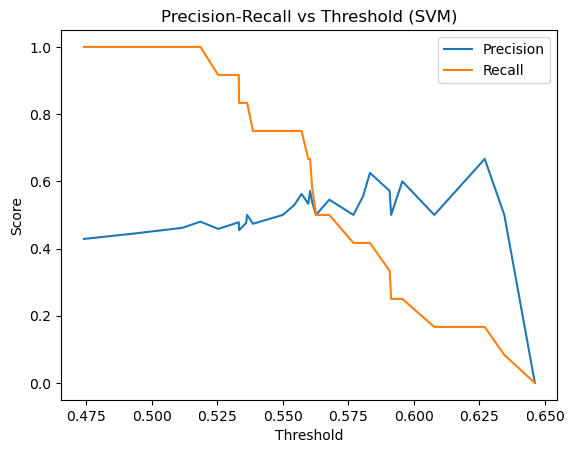

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall for DT as an example
precision, recall, thresholds = precision_recall_curve(y_testR, y_probs_svm)

# Plot precision-recall curve
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold (SVM)")
plt.show()

In [70]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
#Each model should output probabilities (predict_proba) for the positive class (1). 
#Here's how to train and compute probabilities for each model.

# Logistic Regression
#logreg = LogisticRegression(max_iter=1000)
#logreg.fit(X_train, y_train)
#y_probs_lr = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1

# Support Vector Machine (with probability=True)
#svm = SVC(kernel='linear', probability=True)
#svm.fit(X_train, y_train)
#y_probs_svm = svm.predict_proba(X_test)[:, 1]

# Decision Tree
#dt = DecisionTreeClassifier(random_state=42)
#dt.fit(X_train, y_train)
#y_probs_dt = dt.predict_proba(X_test)[:, 1]

# Random Forest
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
#rf.fit(X_train, y_train)
#y_probs_rf = rf.predict_proba(X_test)[:, 1]


In [71]:
#Use roc_curve to compute the True Positive Rate (TPR) and False Positive Rate (FPR) for each model.
# Compute ROC curves and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_testR, y_probs) #logistic regress
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_testR, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_dt, tpr_dt, _ = roc_curve(y_testR, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_testR, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [72]:
#Display the AUC scores for all models.
print(f"Logistic Regression AUC: {roc_auc_lr:.2f}")
print(f"SVM AUC: {roc_auc_svm:.2f}")
print(f"Decision Tree AUC: {roc_auc_dt:.2f}")
print(f"Random Forest AUC: {roc_auc_rf:.2f}")

Logistic Regression AUC: 0.74
SVM AUC: 0.64
Decision Tree AUC: 0.65
Random Forest AUC: 0.60


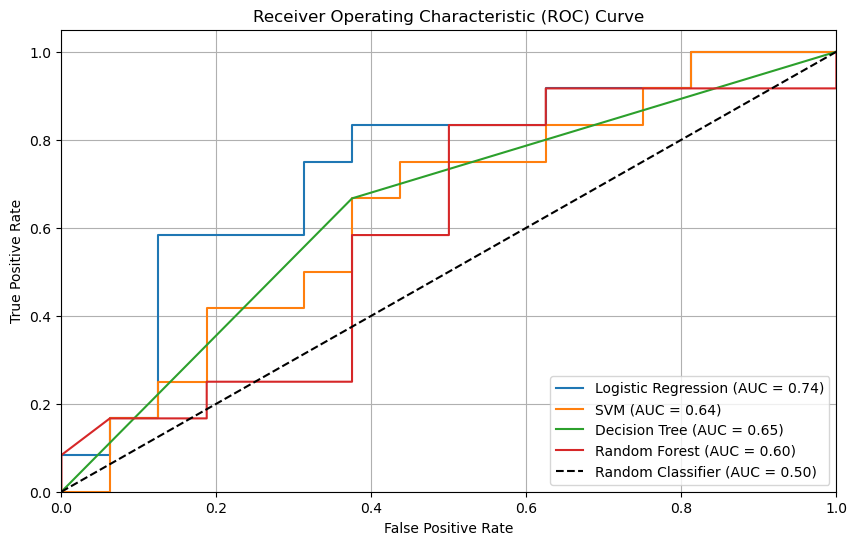

In [76]:
#Plot all ROC curves on the same graph for easy comparison
# Plot ROC curves
plt.figure(figsize=(10, 6))

# Logistic Regression
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")

# SVM
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")

# Decision Tree
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
# Save the plot
plt.savefig("optimal dwi feature set.png", dpi=300, bbox_inches="tight")  
plt.show()
